In [20]:
from skimage.io import imread
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import img_as_float
import numpy as np
import pylab
from sklearn.cluster import KMeans

In [33]:
image = imread("datasets/parrots.jpg")
float_img : np.ndarray = img_as_float(image)
print(float_img.shape)

(474, 713, 3)


In [34]:
shape = float_img.shape
f_img = float_img.reshape((shape[0] * shape[1], 3))
print(f_img)

[[0.01568627 0.49411765 0.01960784]
 [0.01176471 0.49019608 0.01568627]
 [0.00784314 0.49411765 0.00784314]
 ...
 [0.02352941 0.09019608 0.11764706]
 [0.08235294 0.16078431 0.20392157]
 [0.08627451 0.15686275 0.23529412]]


In [29]:
k_means =  KMeans(init='k-means++', random_state=241, n_clusters=20)
k_means.fit(f_img)
k_means.labels_

array([ 1,  1,  1, ...,  3, 15, 15])

In [30]:
cluster_indexes = [np.where(k_means.labels_== label) for label in range(0, k_means.n_clusters)]
mean_colors = np.array([np.mean(f_img[indexes], axis=0) for indexes in cluster_indexes])
median_color = np.array([np.median(f_img[indexes], axis=0) for indexes in cluster_indexes])

In [24]:
mean_image =  mean_colors[k_means.labels_].reshape(image.shape)
median_image =  median_color[k_means.labels_].reshape(image.shape)

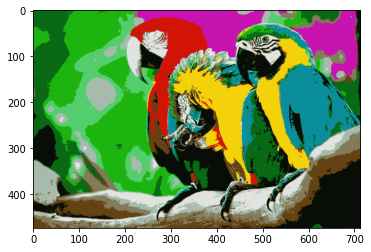

In [25]:
pylab.imshow(mean_image)

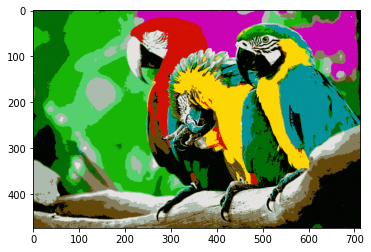

In [26]:
pylab.imshow(median_image)


In [28]:
print(peak_signal_noise_ratio(f_img, mean_image))
print(peak_signal_noise_ratio(f_img, median_image))

5.945968866799268
5.946236135545223


c:\users\admin\.virtualenvs\pandas_trying-m-zk6hwn\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  """Entry point for launching an IPython kernel.
c:\users\admin\.virtualenvs\pandas_trying-m-zk6hwn\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  


[9 9 9 ... 1 1 1]
20.163061926088165
19.884330518697983


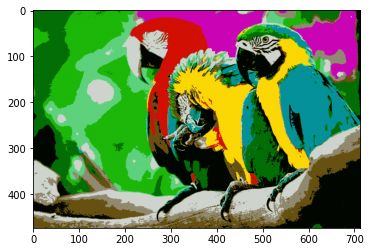

In [42]:
k_means =  KMeans(init='k-means++', random_state=241, n_clusters=11)
k_means.fit(f_img)
print(k_means.labels_)
cluster_indexes = [np.where(k_means.labels_== label) for label in range(0, k_means.n_clusters)]
mean_colors = np.array([np.mean(f_img[indexes], axis=0) for indexes in cluster_indexes])
median_color = np.array([np.median(f_img[indexes], axis=0) for indexes in cluster_indexes])
mean_image =  mean_colors[k_means.labels_].reshape(image.shape)
median_image =  median_color[k_means.labels_].reshape(image.shape)
pylab.imshow(mean_image)
pylab.imshow(median_image)
print(peak_signal_noise_ratio(float_img, mean_image))
print(peak_signal_noise_ratio(float_img, median_image))
